Привет, Максим!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех

Все здорово

<div class="alert alert-block alert-info">

Рад снова приветствовать, Вячеслав!
    
Спасибо за твои комментарии и поправки, как видишь, ни один совет не проходит мимо меня.

# Статистическое исследование данных компьютерных и видеоигр

**Описание данных:**
Исторические данные (до 2016 г.) о продажах игр, оценки пользователей и экспертов, жанры и платформы из открытых источников. Таблица содержит следующие столбцы:
+ `Name` — название игры
+ `Platform` — платформа
+ `Year_of_Release` — год выпуска
+ `Genre` — жанр игры
+ `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
+ `EU_sales` — продажи в Европе (миллионы проданных копий)
+ `JP_sales` — продажи в Японии (миллионы проданных копий)
+ `Other_sales` — продажи в других странах (миллионы проданных копий)
+ `Critic_Score` — оценка критиков (максимум 100)
+ `User_Score` — оценка пользователей (максимум 10)
+ `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Файлы:**
games.csv

**Цель исследования:**

Выявление закономерностей, определяющих успешность игры. Прогнозирование популярных проектов для планирования рекламных кампаний интернет-магазина.

**План исследования:**

1. Загрузка и знакомство с данными. Оценка качества данных.
2. Работа по устранению проблемам в данных.
3. Исследовательский анализ данных.
4. Работа с гипотезами.
5. Общий вывод.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Оформить оглавление не забыл. Это признак хорошего тона. Отлично вышло

**Импорт библиотек:**

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Импорт библиотек проведен в отдельной ячейке кода. Подготовка выполнена правильно

## Загрузка и предпросмотр данных

In [2]:
# записываем в переменную наш датафрейм из csv файла
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# просмотрим первые и последние строки таблицы
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# знакомимся со структурой и типами данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Информацию первичную мы получили.

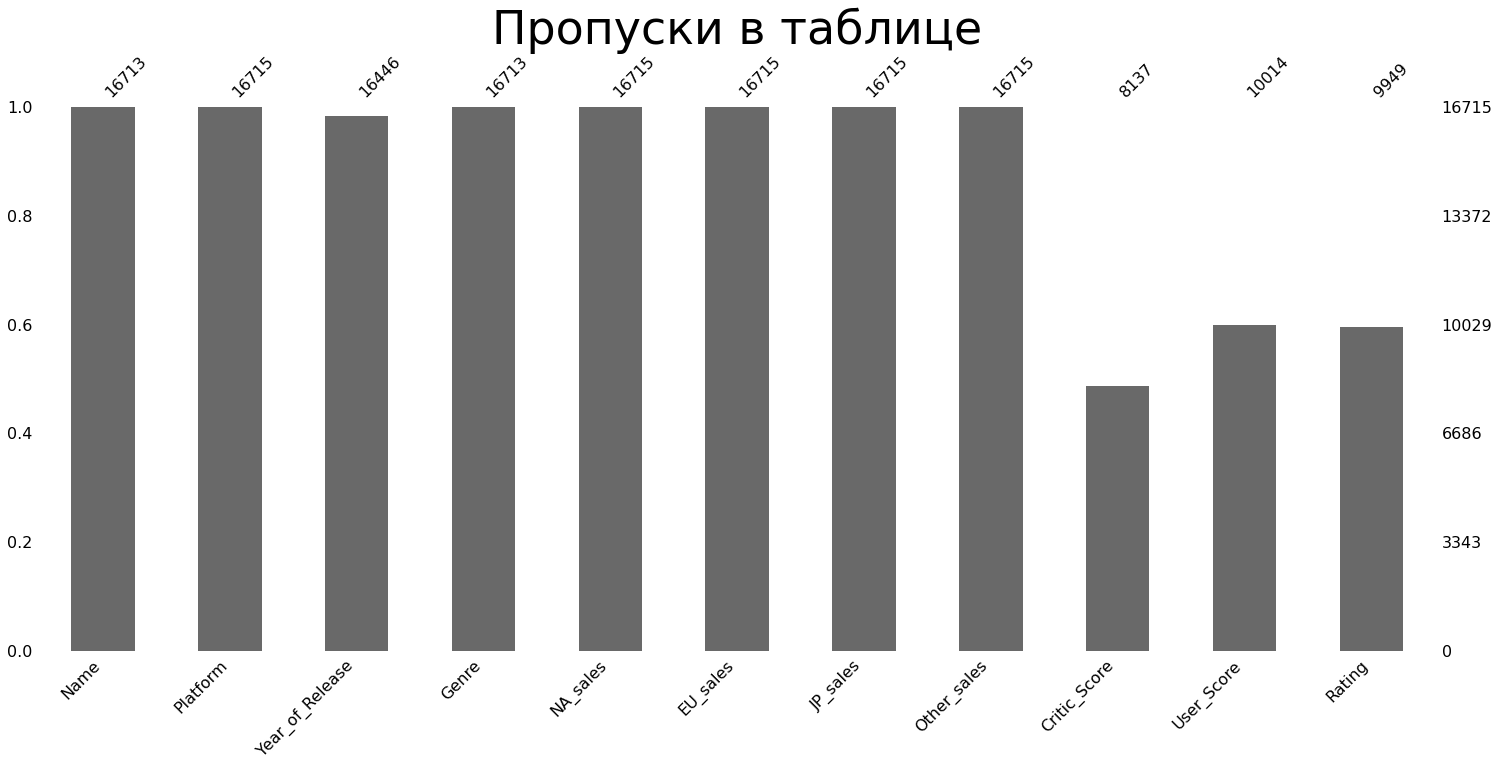

In [5]:
# оценим пропуски с помощью гистограммы
msno.bar(data)
plt.title('Пропуски в таблице', fontsize=46)
plt.show()

In [6]:
# знакомимся с данными
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**

- Наши данные находятся в таблице, состоящей из 16715 строк и 11 колонок  
- В таблице мы наблюдаем следующие проблемы:
    - верхний регистр в названии столбцов  
    - большое количество пропусков особенно в последних трех колонках  
    - неправильный тип данных для год выпуска и оценки пользователей



<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Ну что, могу сказать что проведено образцовое знакомство с данными. Мы ознакомиись с ними и можем переходить к предобработке. 

## Предобработка данных

### Исправление названий

In [7]:
# все названия колонок приводим к нижнему регистпу
data.columns = data.columns.str.lower()
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


### Обработка пропусков

In [8]:
# количество пропусков по каждому столбцу
data.isna().sum()[data.isnull().sum() > 0]

name                  2
year_of_release     269
genre                 2
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Значения с малым количеством пропусков можно без проблем удалить. Даже если удавления останется более 90% данных и это не навредит анализу. А вот с оценками надо острожно. Тут точно важная точечная замена

Очевидно, что у каждой игры должно быть имя и жанр, но в силу некоторой технической ошибки мы имеем по два пропуска в этих стобцах. Строки с пропусками столбцов `name` и `genre` можно просто удалить.

В остальных столбцах нет возможности эту информацию восстановить, замена на медиану/среднее будет неравноценной заменой, удаление приведет к потере большого количества данных, поэтому лучшим решением будет пометить эти данные. В числовых столбцах `year_of_release`, `critic_score`, `user_score` это будет заполнение числом **-1**, в строковом `rating` - заполнение маркером `Not Yet Rated`. Информация об оценках и рейтинге ESRB может отсутствовать для некоторых игр, т.к. является необязательной составляющей. Также ввиду столь большого количества пропусков не стоит исключать наличие технических ошибок на разных этапах обработки информации.

In [9]:
# удалим строки в этих столбцах
data = data.dropna(subset=['name', 'genre'])

In [10]:
# здесь заполним -1
features_to_fill = ['year_of_release', 'critic_score', 'user_score']
data.loc[:, features_to_fill] = data.loc[:, features_to_fill].fillna(-1)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Значение-заглушка это отличное решение 

In [11]:
# заполним маркером "unknown"
data['rating'] = data['rating'].fillna('Not Yet Rated')

In [12]:
# проверим изменения
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [13]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,Not Yet Rated
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,Not Yet Rated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,Not Yet Rated
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,Not Yet Rated
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,Not Yet Rated
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,Not Yet Rated


Все пропуски устранили. В таблице наблюдаем наши маркеры.

### Преобразование типов данных

План действий:  
+ Заменим float на int в столбце с годом выпуска, т.к. это целочисленный показатель
+ Оценку пользователей приведем к численному типу float, с текстом затруднительно будет считать статистику

In [14]:
# приводим к int32
data['year_of_release'] = data['year_of_release'].astype('int32', errors='raise')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

О экономии вычислительной памяти ты не забыл. Супер 

In [15]:
# перед заменой проверим, какие оценки есть
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим строковое значение `tbd`, которое означает, что оценка еще не получена. Заменим ее на **-1**, который в нашем контексте будет означать то же самое, является числом и будет упрощать сортировку в дальнейшем.

In [16]:
# заменим строковое обозначение числом
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
# приведем содержимое к float
data['user_score'] = data['user_score'].astype('float', errors='raise')

In [17]:
# проверяем результат
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Теперь все красиво: пропусков нет, тип данных такой, какой нам нужен.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

А есть еще такой полезный материал `https://newtechaudit.ru/gruzi-daty-krasivo/`

<div class="alert alert-block alert-info">

### Комментарий студента

Спасибо, очень полезно, не раз сталкивался с датой в строковом типе.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Используй и на будущее

### Работа с дубликатами

In [18]:
# проверим таблицу на явные дубли
data.duplicated().sum()

0

Явных дублей не обнаружено. Неявные могут присутствовать в столбцах с строковой информацией. Проверим такие столбцы на однородность имен.

In [19]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [20]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
data['rating'].unique()

array(['E', 'Not Yet Rated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Все названия записаны в единой форме без дублирования.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Все так и есть. Супер 

### Добавление новой информации

Добавим в таблицу столбец, который будет являться суммой продаж всех регионов.

In [22]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) 
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Not Yet Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Для суммирования `df['x'] = df[['a', 'b', 'c']].sum(axis=1)`

<div class="alert alert-block alert-info">
    
### Комментарий студента 

Спасибо, поправил!

**Вывод:**

По итогам предобработки данных выявленые ранее проблемы были устранены, а именно:
+ названия столбцов приведены к нижнему регистру
+ обработаны пропуски:
    + удалены строки в стоблцах `name` и `genre`
    + заполнены числом **-1** в столбцах `year_of_release`, `critic_score`, `user_score`
    + заполнено строкой `Not Yet Rated` в столбце `rating`
+ столбец `year_of_release` был приведен к целочисленному типу, а столбец `user_score` к численному типу, перед этим пришлось заменить оценку `tbd`, что означает ее отсутствие, на число **-1**.

Для дальнейшего анализа данных нам понадобится информация о продажах по всем регионам. Ее мы вычислили и поместили в новый столбец `total_sales`.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Предобработку проведели. И теперь наши данные готовы к дальнейшему анализу 

## Исследовательский анализ данных

### Число выпущенных игр по годам

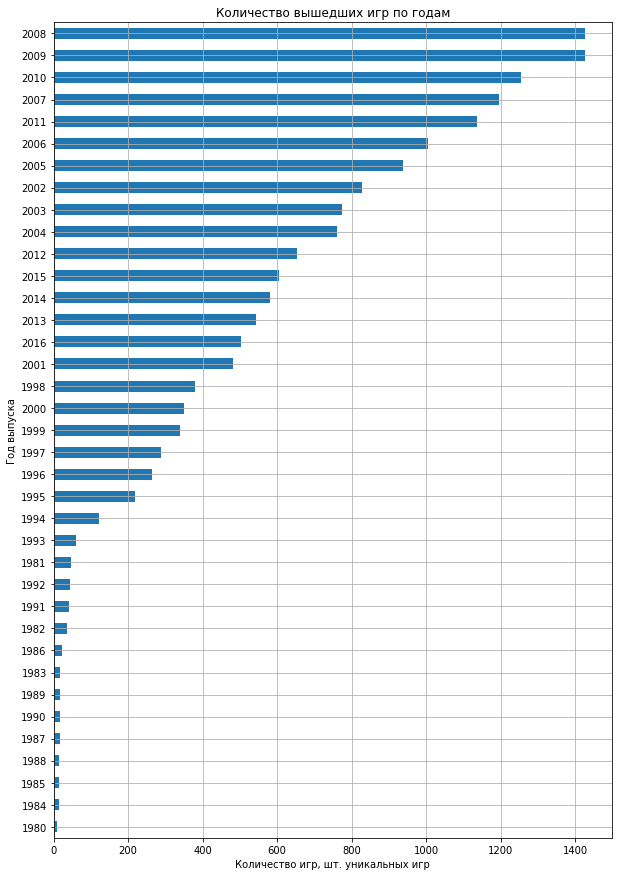

In [23]:
# строим диаграмму вышедших игр в каждый год
(data
    .query('year_of_release > -1')['year_of_release'] # фильруем данные без года
    .value_counts()
    .sort_values()
    .plot(kind='barh', figsize=(10, 15))
)
plt.title('Количество вышедших игр по годам')
plt.ylabel('Год выпуска')
plt.xlabel('Количество игр, шт. уникальных игр')
plt.grid(True)
plt.show()

In [24]:
data['year_of_release'].value_counts().describe()

count      38.000000
mean      439.815789
std       446.367916
min         9.000000
25%        37.250000
50%       313.500000
75%       734.750000
max      1427.000000
Name: year_of_release, dtype: float64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Вот тут очень не хватает графика для восприятия результата.

<div class="alert alert-block alert-info">
 
### Комментарий студента

Добавил.

По годам мы наблюдаем следующую тенденцию:
+ в 80-е годы игр выпускалось десятки в год. По статистике эти годы находятся в первом квартиле по количеству почти не превышая 21 игры в год. За исключением 1981(46) и 1982(36), что наводит на мысли, что потерянные годы в таблице, это годы с 1980 по 1990.
+ количество игр после 1990 года выглядят правдопобно, без резких скачков, как в предыдущем десятилетии.

На основании вышесказанного лучше учитывать только игры, выпущенные после 1990 года, чтобы избежать влияния потери привязки к году в более ранний период.

### Число продаж по игровым платформам

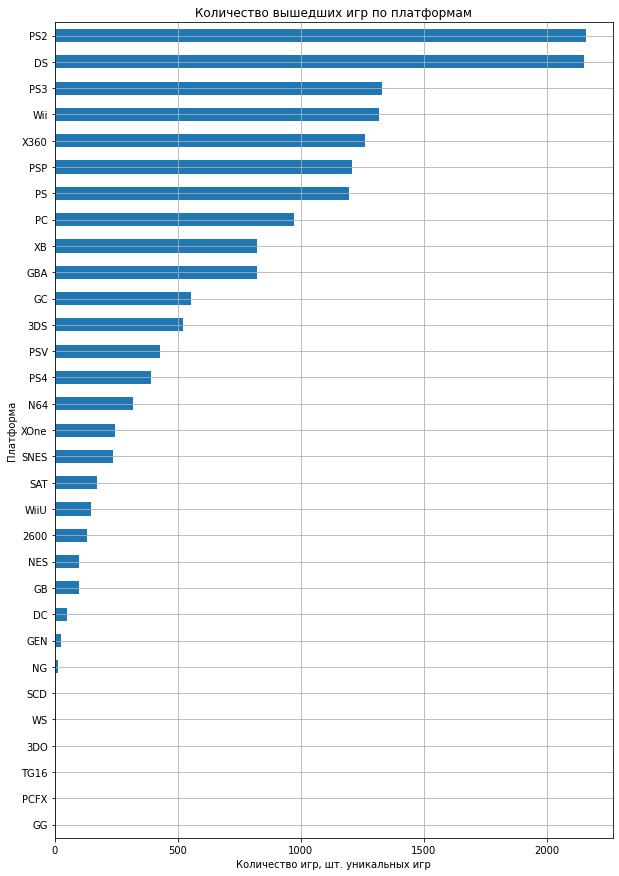

In [25]:
(data['platform']
     .value_counts()
     .sort_values()
     .plot(kind='barh', figsize=(10, 15))
)

plt.title('Количество вышедших игр по платформам')
plt.ylabel('Платформа')
plt.xlabel('Количество игр, шт. уникальных игр')
plt.grid(True)
plt.show()

По количеству вышедших игр можно выделить топ-7 платформ, имеющих свыше тысячи игр: от `PS2` до `PS`.

In [26]:
(data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False))

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рейтинг суммарных продаж получен

По суммарным продажам у нас снова лидирует `PS2`. Визуально нижнюю границу топа по суммарным продажам можно опять провести по `PS`, но тогда мы не рассмотрим `PS4`, `PSP`, и самое главное `PC`. Т.к. компьютер это основополагающая игровая платформа, то и границу топа проведем по нему.

In [27]:
# определим топ платформ в список
top_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').query('total_sales > 259').index
top_platforms

Index(['DS', 'GBA', 'PC', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'Wii', 'X360'], dtype='object', name='platform')

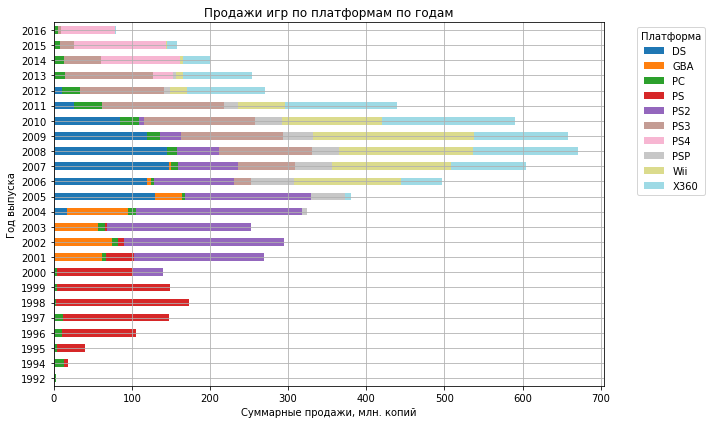

In [28]:
(data
    .query('year_of_release > 1990 and platform in @top_platforms') # делаем срез с учетом года и платформы
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') # каждый столбец это платформа
    .fillna(0) # заполним пропуски 0
    .plot(kind='barh', stacked=True, figsize=(10, 6), colormap='tab20')
)

plt.title('Продажи игр по платформам по годам')
plt.ylabel('Год выпуска')
plt.xlabel('Суммарные продажи, млн. копий')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

А вот здесь больше спасибо за график. Сразу легко делаются выводы на его основе

На данном графике мы наблюдаем жизненный цикл нескольких семейств платформ:
+ **PC:** компютер присутствовал и будет присутствовать всегда, потому что в отличие от консолей имеет не только развлекательное назначение. Поэтому и продажи игр будут не самыми высокими.
+ **Xbox:** на графике представлено только одно поколение `X360`. Продолжительность его жизненного цикла оценивается в 11 лет.
+ **Playstation:** представлены на графике четыре поколения (`PS`, `PS2`, `PS3`, `PS4`) плюс портативная версия `PSP`. Имеет такое широкое представление поколений, т.к. на данном отрезке времени является лидером рынка по продажам. Жизненный цикл консоли равен 10-11 годам.
+ **Nintendo:** на графике представлена приставками `GBA`, `Wii` и `DS`. Жизненный цикл консолей от 7(`GBA`) до 9(`Wii`, `DS`) лет.  

### Анализ продаж актуального периода

Для построения прогнозов на 2017 год, имея данные до 2016 года необходимо определить период, который будет актуальным для нас. Продажи видеоигр неразравно связаны с жизненным циклом консолей, поэтому изучение продаж должно ориентироваться на рынок консолей. Из предыдущего графика мы заключили, что жизненный цикл игровой платформы равен примерно 10 годам. Так же стоит учесть, что на 2016 год приходится расцвет `PS4` и запуск/продолжение консолей Nintendo и Xbox. Поэтому для того, чтобы получить релевантные данные, привязанные к развитию актуальных современных консолей следует рассмотреть последние 3 года (2012-2016 гг.), т.к. они являются периодом развития как новой платформы от Sony, которая занимает главенствующее положение, так и других платформ-конкурентов. И, в целом, игровая индустрия является быстроразвивающейся.

In [29]:
actual_data = data.query('year_of_release > 2012').reset_index(drop=True)
actual_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Not Yet Rated,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,Not Yet Rated,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2228,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Yet Rated,0.01
2229,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Yet Rated,0.01
2230,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Yet Rated,0.01
2231,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,Not Yet Rated,0.01


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет

Все же прогноз в крупных компаниях правильно считать за последние 2-3 года. А у тебя сфера видеоигр где все быстро меняется и легко отловать отжившие тренды.

<div class="alert alert-block alert-info">
 
### Комментарий студента
    
уменьшил величину актуального периода до 3 лет.

Построим аналогичный график для оценки актуального периода.

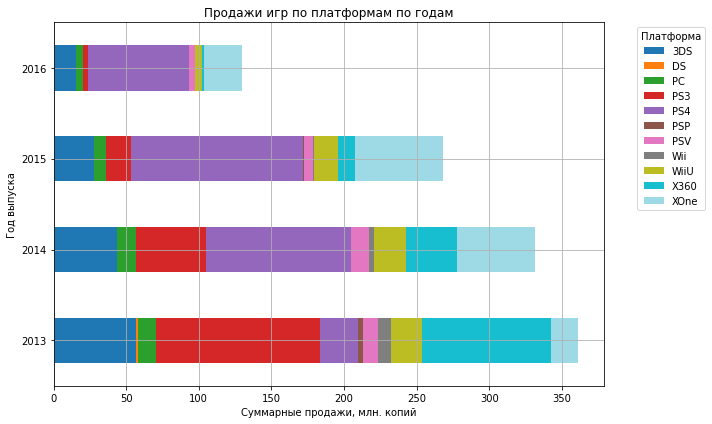

In [30]:
(actual_data
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') # каждый столбец это платформа
    .fillna(0) # заполним пропуски 0
    .plot(kind='barh', stacked=True, figsize=(10, 6), colormap='tab20')
)

plt.title('Продажи игр по платформам по годам')
plt.ylabel('Год выпуска')
plt.xlabel('Суммарные продажи, млн. копий')
plt.legend(title='Платформа', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.grid(True)
plt.show()

Поскольку данные за 2016 год неполные, чтобы определить корректную ситуацию на рынке лучше смотреть до 2015 г. Из этого периода видно, что:
+ лидером рынка является `PS4`, `XOne`, `3DS` (это характерно и для 2016 года);
+ продажи растут для `PS4`, `XOne`;
+ продажи падают для `3DS`, `PS3`, `PSV`, `X360`, `Wii`, `PSP`, `DS`;
+ стагнирующее ситуация для `WiiU`, `PC`.

Стоит отметить важную деталь, что в целом продажи игр снизились после 2013 года, видимо запуски новых платформ Microsoft и Playstation не подогрели интереса к видеоиграм как предудыщее поколение консолей. 

2016 г. можно использовать для относительной оценки, т.к. неполнота данных равномерна для всех консолей (данные предоставлены до какого-то периода 2016 г.). Так потенциально прибыльные платформы для 2017 года можно выбрать из лидеров 2016 года.

In [31]:
(actual_data.query('year_of_release == 2016') # берем данные за 2016 год
    .pivot_table(index='platform', values='total_sales', aggfunc='sum') # формируем таблицу платформа-суммарные продажи
    .sort_values(by='total_sales', ascending=False)
    .assign(market_share=lambda x: x['total_sales'] / x['total_sales'].sum()) # добавляем столбец с долей всех продаж
)

,total_sales,market_share
platform,,
PS4,69.25,0.532938
XOne,26.15,0.201247
3DS,15.14,0.116515
PC,5.25,0.040403
WiiU,4.60,0.035401
PSV,4.25,0.032707
PS3,3.60,0.027705
X360,1.52,0.011698
Wii,0.18,0.001385


На основе этих данных можно выделить список потенциальных платформ, а значит и игр на эти платформы для 2017 года:
+ `PS4`;
+ `XOne`;
+ `3DS` несмотря на завершение цикла, имеет приличную долю от всего рынка, что нельзя игнорировать;
+ `PC`, `WiiU`стабильный сегмент за последние годы.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Наиболее потенциальные платформы определены. Здорово

### Статистический анализ рынка

In [32]:
top_platforms = ['PS4', 'XOne', '3DS', 'PC', 'WiiU']

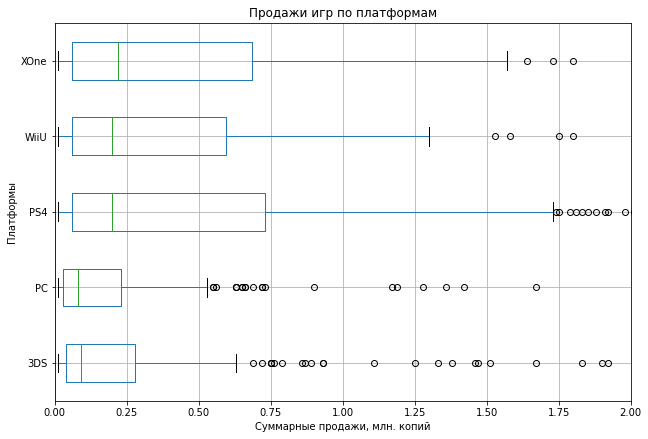

In [33]:
(actual_data
     .query('platform in @top_platforms') # рассмотрим только топовые платформы
     .boxplot(column='total_sales', by='platform', vert=False, figsize=(10, 7)))

plt.xlim(0, 2)
plt.title('Продажи игр по платформам')
plt.suptitle('')
plt.ylabel('Платформы')
plt.xlabel('Суммарные продажи, млн. копий')
plt.show()


Данный график показывает нам, что применяя межквартильный размах для расчета статистических выбросов, много значений попадает в эту категорию. Поэтому неправильным будет просто отсечь все выбросы в данных. Это объясняется спецификой рынка есть определенные игры, которые расходятся намного большим тиражом, чем большинство других, а эти хиты являются определяющими в жанре/платформе и их нельзя исключать из расчетов. На основании этого данные от выбросов очищать не будем.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка

Здесь будет правильнее оставить штук 5 наиболее перспективных платформ актуального пероида. А еще можно огранчить вывод выбросов при помощи метода ylim() и смотруть на более чистые данные 

<div class="alert alert-block alert-info">
 
### Комментарий студента  
По межквартильному размаху можно выделить три самые массовые по продажам платформы, это и есть последнее поколение приставок `PS4`, `Xone`, `Wiiu`. Причем лидером среди них является консоль от PlayStation. Среднее количество проданных копий примерно одинаковое для рассмотренных выше платформ, немногим больше имеет платформа `Xone`. Многим меньше имеют среднее значение `PC` и `3DS` и в целом сильно уступают размахом консолям из топ-3.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Теперь стало отлично. Молодец 

### Влияние оценок на продажи

Проследим связь между оценками и продажами на одной платформе. Выберем самую популярную консоль актуального периода. Под такой критерий подходит приставка `PS4`. Рассмотрим не тоько суммарные продажи, но и продажи по регионам, чтобы оценить однородность взаимосвязи продаж и оценок.



In [34]:
# выделим нужные данные в отдельный датафрейм
data_scores = (actual_data
                    .query('platform == "PS4" and critic_score > -1.0 and user_score > -1.0') 
                    .loc[:, ['critic_score', 'user_score', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
              )
data_scores.head(3)

,critic_score,user_score,total_sales,na_sales,eu_sales,jp_sales,other_sales
4,97.0,8.3,12.62,3.96,6.31,0.38,1.97
9,82.0,4.3,8.58,1.12,6.12,0.06,1.28
11,83.0,5.7,7.66,2.81,3.48,0.14,1.23


In [35]:
# найдем коэффициент корреляции
data_scores.corr()

,critic_score,user_score,total_sales,na_sales,eu_sales,jp_sales,other_sales
critic_score,1.000000,0.557654,0.405895,0.414241,0.346044,0.322057,0.408465
user_score,0.557654,1.000000,-0.033625,-0.022577,-0.050671,0.174512,-0.037332
total_sales,0.405895,-0.033625,1.000000,0.893807,0.951656,0.592214,0.997798
na_sales,0.414241,-0.022577,0.893807,1.000000,0.714988,0.530480,0.915292
eu_sales,0.346044,-0.050671,0.951656,0.714988,1.000000,0.519826,0.935136
jp_sales,0.322057,0.174512,0.592214,0.530480,0.519826,1.000000,0.566734
other_sales,0.408465,-0.037332,0.997798,0.915292,0.935136,0.566734,1.000000


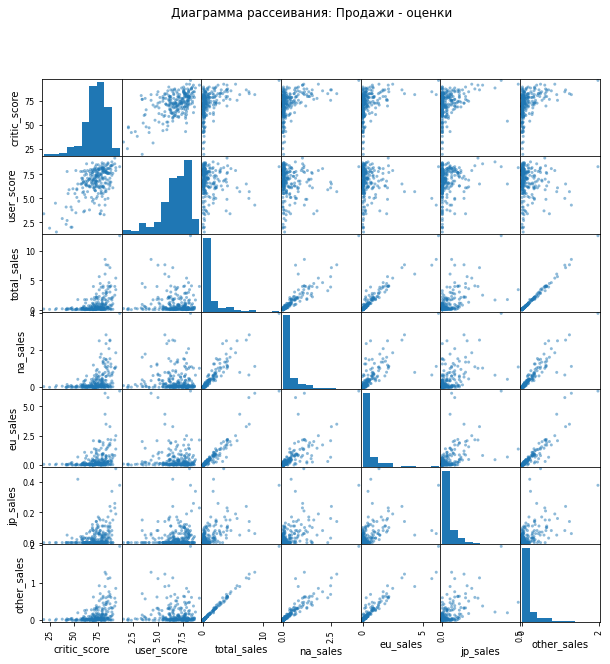

In [36]:
pd.plotting.scatter_matrix(data_scores, figsize=(10, 10))
plt.suptitle('Диаграмма рассеивания: Продажи - оценки')
plt.show()

По диаграмме и коэффициентам корреляции можем сделать следующие выводы:
+ между оценкой критиков и суммарными продажами существует положительная корреляция, т.е. игры с большими продажами получают высокие оценки, однако коэффициент корреляции не достаточно высокий (0,4), чтобы говорить о сильной связи.
+ между оценками пользователей и суммарными продажами наблюдается околонулевая и даже отрицательная связь. С оценками пользователей все менее однозначно, если взглянуть на диаграмму рассеивания, то какую-либо связь трудно заметить.
+ продажи по регионам примерно одинаково взаимосвязаны с оценкой критиков. Колебания коэффициента корреляции составляют от 0.32 (JP) до 0.41(NA).
+ во взаимосвязи оценки пользователей и продажами по регионам схожая ситуация как и с суммарными продажами за исключением Японии, продажи которой демонстрируют очень слабую, но положительную корреляцию (0.17).

Таким образом, мы видим некоторую положительную корреляцию между оценками критиков и продажами игр. Это обусловлено профессионализмом и объективностью оценки. Отсутствие связи между оценкой пользователей и продажами помимо субъективизма можно объяснить небольшим процентом человек, который выставляет эту оценку. Большинство игроков может игнорировать оценивание, но при этом покупать продукт.

Для прогнозирования продаж можно использовать только оценки критиков.

Посмотрим на все платформы, можно ли данный вывод перенести на них.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Здесь подобран удобный метод для показа зависимости одно параметра от другого. Здорово

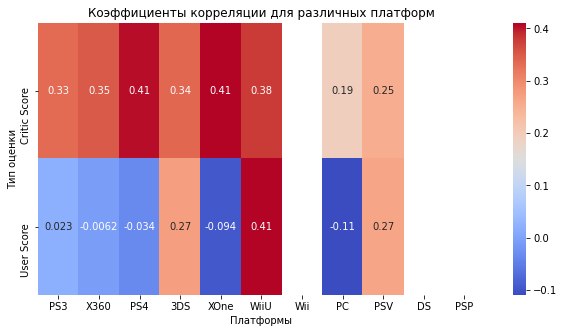

In [37]:
# список со всеми актуальными платформами
actual_platforms = actual_data['platform'].unique()

# создадим список для коэффициентов
cor_coef = []


for platform in actual_platforms:
    correlation = (
        actual_data
        .query('platform == @platform and critic_score > -1.0 and user_score > -1.0') # продажи учитываем только суммарные
        .loc[:, ['critic_score', 'user_score', 'total_sales']]
        .corr()
        .loc['total_sales', ['critic_score', 'user_score']]
    )
    
    # добавим коэффициенты в список
    cor_coef.append([platform, correlation["critic_score"], correlation["user_score"]])

# создадим датафрейм
correlation_data = pd.DataFrame(cor_coef, columns=['Platform', 'Critic Score', 'User Score'])

# построим тепловую карту
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_data.set_index('Platform').T, annot=True, cmap='coolwarm', cbar=True)
plt.title('Коэффициенты корреляции для различных платформ')
plt.xlabel('Платформы')
plt.ylabel('Тип оценки')
plt.show()


По тепловой карте мы можем сделать следующие выводы:
+ ведущие платформы последнего поколения (`PS4` и `XOne`) имеют примерно одинаковые коэффициенты.
+ платформы предыдущего поколения имеют более слабую связь оценки критиков и продаж (`PS3`, `X360`, `3DS`).
+ игры для компьютера также имеют более слабую корреляцию между оценкой критиков и продажами, но более сильную отрицательную между оценкой пользователей и продажами.
+ отсутствие информации для `DS` и `PSP` обусловлено отсутствием данных об оценках.
+ необычные показатели связи для `PSV`, `Wii` обусловлены небольшим количеством данных.
+ действительно необычный результат можно наблюдать для приставки `WiiU`, `3DS`, где мы видим, что корреляция между разным типом оценок и продажами практически сходна. Что говорит об особенностях аудитории данной приставки.

In [38]:
# данные для всех платформ
(actual_data
    .query('critic_score > -1.0 and user_score > -1.0') 
    .loc[:, ['critic_score', 'user_score', 'total_sales']]
    .corr() 
)

,critic_score,user_score,total_sales
critic_score,1.000000,0.502221,0.311692
user_score,0.502221,1.000000,-0.004064
total_sales,0.311692,-0.004064,1.000000


В целом, если мы построим на корреляцию между оценками и суммарными продажами, то вывод, который мы получили для приставки `PS4` будет такой же. Оценка критиков имеет слабую положительную корреляцию, оценки пользователей не коррелируют с продажами.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Выводы на основе графиков нескольких платформ выглядят убедительнее

### Анализ жанров игр

In [39]:
# создадим сводную таблицу о продажах по жанрам игр
(actual_data
    .pivot_table(index='genre', values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Action,118.13,40.49,126.05,37.20,321.87
Shooter,87.86,6.61,109.74,28.77,232.98
Sports,60.52,5.41,65.27,19.45,150.65
Role-Playing,36.97,51.04,46.40,11.48,145.89
Misc,20.04,9.20,27.49,6.09,62.82
Platform,15.58,4.79,18.14,4.12,42.63
Racing,20.19,2.30,12.96,4.44,39.89
Fighting,8.55,7.65,15.55,3.56,35.31
Adventure,8.25,5.82,7.14,2.43,23.64


Из данной таблицы следует:
+ Из суммарных продаж можно выделить топ жанров, превыщающих 100 млн. копий:
    + `Action`
    + `Shooter`
    + `Role-Playing`
    + `Sports`
+ Из суммарных продаж можно выделить жанры аутсайдеры: `Adventure`, `Strategy`, `Puzzle` с продажами менее 30 млн. копий.
+ По регионам эти топы будут схожими, за исключением японского региона. Там топ-4 продаваемых жанров выглядит следующим образом: `Role-Playing`, `Action`, `Misc`, `Simulation`, а топ-3 наименее реализумых жанров: `Strategy`, `Adventure`, `Puzzle`. 

Это следует учитывать при планировании продаж.


<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех

Вывод изменился и здесь. Отлично получилось

In [40]:
# создадим сводную таблицу о продажах по жанрам игр
(actual_data
    .pivot_table(index='genre', values=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Shooter,0.190,0.00,0.200,0.050,0.450
Sports,0.050,0.00,0.080,0.020,0.240
Platform,0.080,0.00,0.090,0.025,0.225
Role-Playing,0.010,0.05,0.020,0.010,0.125
Fighting,0.020,0.03,0.045,0.010,0.125
Racing,0.060,0.00,0.030,0.010,0.120
Action,0.020,0.01,0.020,0.010,0.110
Simulation,0.035,0.00,0.000,0.005,0.100
Misc,0.010,0.02,0.010,0.000,0.100


<div class="alert alert-block alert-info">
 
### Комментарий студента
    
Однако, чтобы судить о популярности того или иного жанра нужно нивелировать влияние количества выпускаемых игр. Это можно сделать с помощью медианы (среднее будет завышено в некоторых жанрах из-за отдельных хитов). 
    
Согласно полученной таблице самыми популярными жанрами в мире являются `Shooter`, `Sports`, `Platform`. Наименее популярными - `Strategy`, `Adventure`, `Puzzle`. 
    
Отдельные предпочтения в регионах обсудим в следующем разделе.

Резюмируем по данному разделу:
+ Жизненный цикл основных игровых платформ 9-11 лет.
+ Для прогнозирования продаж на 2017 год было принято решение о использовании данных за последние 3 года. Это связано с развитием в указанный период нового поколения игровых консолей PlayStation, Xbox, Nintendo. 
+ Лидирующими по суммарным продажам являются платформы PS4, XOne, 3DS. Причем у первых двух продажи растут от год года.
+ Специфика игрового рынка заключается в наличие небольшого количества продуктов с очень большими показателями продаж, что при статистической обработке будет признано за выбросы, поэтому не следует применять классические подходы очистки данных.
+ Однако статистически выделяются три платформы, имеющие наибольший охват PS4, XOne и WiiU, которые к тому же имеют примерно одинаковое среднее по суммарным продажам.
+ Мы установили положительную корреляцию между оценкой критиков и продажами. Корреляция между оценкой пользователей и продажами практически отсутствует кроме игр для платформ WiiU и 3DS.
+ Абсолютными лидирующими жанрами в продажах являются такие жанры как `Action`, `Shooter`, `Role-Playing`, `Sports`. Меньшие продажи игр в жанрах `Adventure`, `Strategy`, `Puzzle`.
+ Наиболее популярными в мире жанрами являются `Shooter`, `Sports`, `Platform`.  Наименее популярными - `Strategy`, `Adventure`, `Puzzle`. 
 

## Портрет пользователя

### Самые популярные платформы

In [41]:
# создадим сводную таблицу с региональными продажами по платформам
data_regions_platfom = (actual_data
    .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)
data_regions_platfom

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


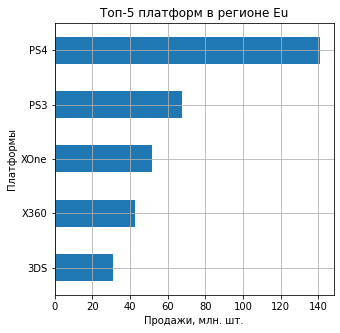

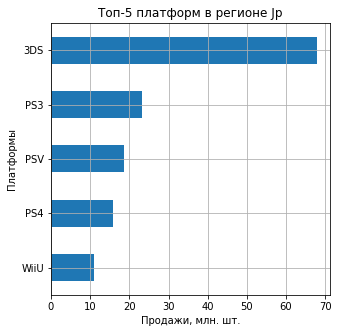

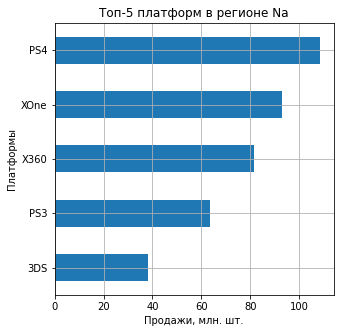

In [42]:
# для каждого региона построим диаграмму
for region in data_regions_platfom.columns:
    
    data_regions_platfom[region].sort_values().tail(5).plot(kind='barh', figsize=(5, 5))
    
    region_name = region.split('_')[0].title()
    
    plt.title(f'Топ-5 платформ в регионе {region_name}')
    plt.ylabel('Платформы')
    plt.xlabel('Продажи, млн. шт.')
    plt.grid(True)
    plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Первичное представление о регионах получено

Совсем непохожими по самым популярным платформам получились регионы:
+ В **Европе** однозначно ценят Playstation, причем она занимает первые две строчки (PS4 - свыше 140 млн. и PS3 - свыше 100). Заметно отстает Xbox, представленный тоже двумя поколениями (X360 - более 70 млн, Xone - около 50). На последнем месте топа 3DS - чуть более 40 млн.
+ Противоположные предпочтения имеют в **Японском регионе**. Так 3DS там является абсолютным лидером (около 90 млн.). С заметным отставанием располагаются приставки Sony (PS3 - 35 млн., PSV - 21 млн., PS4 - 16 млн.). Замыкает топ-5 платформа WiiU - около 3 млн. Стоит отметить, что в этом регионе практически полностью отсутствует интерес к продуктам Microsoft (платформы Xbox, PC).
+ В отличие от Японии **Североамериканский регион** наоборот больше всего предпочитает продукты Microsoft. На первом месте X360 - 140 млн., дальше два поколения приставок PlayStation (PS4 - 109 млн. PS3 - 103 млн.) и последней в топе платформа 3DS - 55 млн.

### Самые популярные жанры игр

In [43]:
# создадим сводную таблицу с региональными продажами по жанрам
data_regions_genre = (data
    .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median') # используем медиану для оценки популярности
)
data_regions_genre

,eu_sales,jp_sales,na_sales
genre,,,
Action,0.03,0.00,0.10
Adventure,0.00,0.01,0.00
Fighting,0.02,0.02,0.08
Misc,0.01,0.00,0.08
Platform,0.05,0.00,0.14
Puzzle,0.01,0.00,0.05
Racing,0.04,0.00,0.10
Role-Playing,0.01,0.05,0.04
Shooter,0.05,0.00,0.12


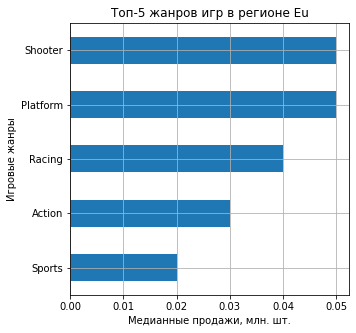

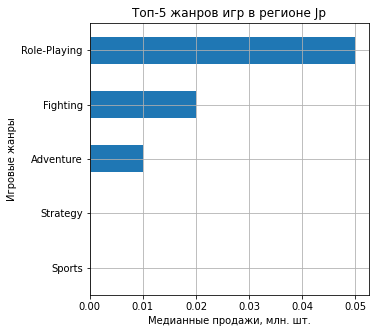

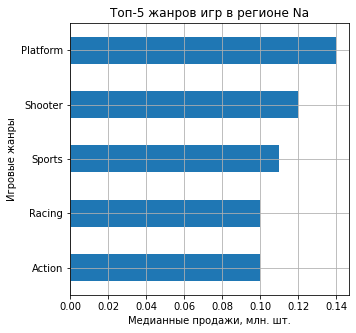

In [53]:
# для каждого региона построим диаграмму
for region in data_regions_genre.columns:
    
    data_regions_genre[region].sort_values().tail(5).plot(kind='barh', figsize=(5, 5))
    
    region_name = region.split('_')[0].title()
    
    plt.title(f'Топ-5 жанров игр в регионе {region_name}')
    plt.ylabel('Игровые жанры')
    plt.xlabel('Медианные продажи, млн. шт.')
    plt.grid(True) 
    plt.show()

Самые популярные игровые жанры **Европейского** и **Североамериканского** регионов очень сходны:
+ `Shooter`/ `Platform;
+ `Platform`/ `Shooter`;
+ `Racing`/ `Sports`;
+ `Action`/`Racing`;
+ `Sports` / `Action`.
 
Разница заключается лишь в порядке позиций. Такое сходство объясняется идентичностью культурных и социальных особенностей.

В **Японском** регионе самыми популярными жанрами являются:
+ `Role-Playing`;
+ `Fighting`;
+ `Adventure`;
+ `Strategy`;
+ `Sports`.

Это подчеркивает самобытность японской культуры и вкусы игроков.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

А вот здесь хорошо заметно, что Япония наиболее уникальна среди регионов

### Влияние рейтинга ESRB на продажи

In [45]:
# выделим нужные данные в отдельный датафрейм
data_esrb = (actual_data.query('rating != "Not Yet Rated"') # отфильтруем данные
                    .loc[:, ['rating', 'total_sales', 'na_sales', 'eu_sales', 'jp_sales']] # оставим колонки с продажами
              )
data_esrb['rating'].unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

Преобразуем наши категориальные данные в числа для того, чтобы можно было найти коэффициент корреляции.

In [46]:
# Функция принимает значение и присваивает число в зависимости от рейтинга
def categorise_esrb(rating):
    if rating == 'M':
        return 17 # числа взяты по минимальному порогу для каждой категории рейтинга
    elif rating == 'E':
        return 0
    elif rating == 'E10+':
        return 10
    else:
        return 13

In [47]:
# применим функцию к каждой строке
data_esrb['rating_encoded'] = data_esrb['rating'].apply(categorise_esrb)
data_esrb.head(3)

,rating,total_sales,na_sales,eu_sales,jp_sales,rating_encoded
0,M,21.05,7.02,9.09,0.98,17
1,M,16.27,9.66,5.14,0.06,17
4,M,12.62,3.96,6.31,0.38,17


In [48]:
# функция принимает название столбца, вычисляет и печатает коэффициент корреляции Пирсона
def compute_corr(column):
    
    corr_coeff = data_esrb['rating_encoded'].corr(data_esrb[column])
    
    print(f'Коэффициент корреляции между рейтингом ESRB и "{column}": {corr_coeff:.2f}')

In [49]:
features_to_corr = ['total_sales', 'na_sales', 'eu_sales', 'jp_sales']

for sales in features_to_corr:
    compute_corr(sales)

Коэффициент корреляции между рейтингом ESRB и "total_sales": 0.06
Коэффициент корреляции между рейтингом ESRB и "na_sales": 0.07
Коэффициент корреляции между рейтингом ESRB и "eu_sales": 0.04
Коэффициент корреляции между рейтингом ESRB и "jp_sales": -0.01


Можно сказать, что данные рейтинга и продаж не взаимосвязаны.

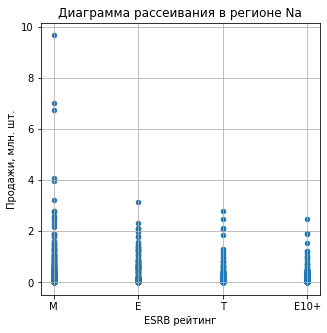

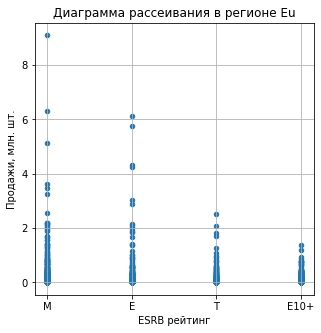

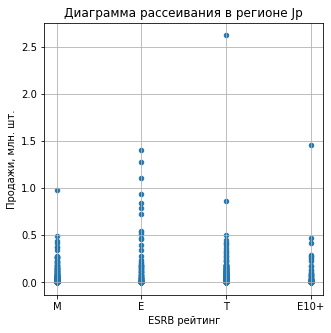

In [50]:
for region in ['na_sales', 'eu_sales', 'jp_sales']: 
    
    data_esrb.plot(kind='scatter', x='rating', y=region, figsize=(5, 5))
    
    region_name = region.split('_')[0].title()
    
    plt.title(f'Диаграмма рассеивания в регионе {region_name}')
    plt.ylabel('Продажи, млн. шт.')
    plt.xlabel('ESRB рейтинг')
    plt.grid(True)
    plt.show()

По диаграммам рассеивания видно, что в большинстве своем игры продавались одинаково для всех рейтингов. Можно сказать, что для определенных рейтингов существует больше отдельных игр, проданных большим тиражом. Так, например в **Европе** и **Северной Америке** больше хитов для рейтинга `M`, в **Японии**, напротив, потенциальные хиты находятся в детских играх.

**Вывод:**
По итогам этого раздела мы получили описание пользователя, характерное для региона:
+ **Европа:** предпочитающие новинки в игровом мире, преимущественно использующие платформы PlayStation и Xbox. Жанровые предпочтения стандартные для общемирового - `Action`, `Sports`, `Shooter`, `Platform`, `Racing`.
+ **Северная Америка:** пользователи больше предпочитают играть на платформе от Microsoft, но также велика доля приставок PS4 и PS3. Жанровые предпочтения совпадают с европейцами, отличается лишь порядком позиций.
+ **Япония:** отличается от других регионов как предпочитаемой платформой - 3DS и много меньше PlayStation(ценят портативные консоли), так и жанровым топом игр - на первом месте это ролевые игры, а стандартные стрелялки не попали даже в топ-5.

Корреляции между рейтингом ESRB  и продажами выявлено не было. Но из особенностей, связанных с этим рейтингом, можно выделить, что в **Европе** и **Северной Америке** больше хитов, имеющих большие продажи, получают рейтинг `M`, а в **Японии** такие хиты имеют рейтинг `E`.


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Рассмотрев каждый из регионов мы пришли к выводу, что у всех есть своя специфика и это точно стоит учитывать при прогноза на 2017 год.

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Перед нами стоит задача сравнить две выборки пользовательского рейтинга для разных платформ. Эти выборки независимые. Требуется узнать равны ли выборочные средние. 

За нулевую гипотезу примем следующее утверждение: **Среднее пользовательского рейтинга для Xbox One равно среднему пользовательского рейтинга PC.**

За альтернативную гипотезу примем: **Среднее пользовательского рейтинга для Xbox One *не* равно среднему пользовательского рейтинга PC.**

Таким образом, мы будем проводить двухвыборочный одностороний тест для независимых выборок.

In [51]:
# создаем две независимые выборки
user_score_xbox = actual_data.query('platform == "XOne" and user_score > -1.0')['user_score']
user_score_pc = actual_data.query('platform == "PC" and user_score > -1.0')['user_score']

# уровень значимости
alpha = .05

results = st.ttest_ind(user_score_xbox, user_score_pc) 

print('Нулевая гипотеза: выборочные средние равны.')
print('Альтернативная гипотеза: выборочные средние не равны.')
print('-' * 80)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной.')
    print('Среднее пользовательского рейтинга для Xbox One не равно среднему пользовательского рейтинга PC.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Среднее пользовательского рейтинга для Xbox One равно среднему пользовательского рейтинга PC.')

Нулевая гипотеза: выборочные средние равны.
Альтернативная гипотеза: выборочные средние не равны.
--------------------------------------------------------------------------------
p-value: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Среднее пользовательского рейтинга для Xbox One равно среднему пользовательского рейтинга PC.


Вероятность того, что выборочные средние будут равны, очень высока и не позволяет нам опровергнуть нулевую гипотезу.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Гипотезы сформулированы и верно определен метод проверки. С выводами согласен. 

### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Снова имеем две независимые выборки пользовательского рейтинга разных жанров. На этот раз требуется установить, что рейтинги не равны. Но утверждение о равенстве средних значений может не только утверждать равенство, в случае опровержения утверждения мы получаем подтверждение обратного, поэтому:
+ Нулевая гипотеза: **Среднее пользовательского рейтинга жанра  Action равно среднему пользовательского рейтинга жанра  Sports.**
+ Альтернативная гипотеза: **Среднее пользовательского рейтинга жанра  Action *не* равно среднему пользовательского рейтинга жанра  Sports.**

С помщью теста Стьюдента выясним это.

In [52]:
# создаем две независимые выборки
user_score_action = actual_data.query('genre == "Action" and user_score > -1.0')['user_score']
user_score_sports = actual_data.query('genre == "Sports" and user_score > -1.0')['user_score']

# уровень значимости
alpha = .05

results = st.ttest_ind(user_score_action, user_score_sports) 

print('Нулевая гипотеза: выборочные средние равны.')
print('Альтернативная гипотеза: выборочные средние не равны.')
print('-' * 80)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу в пользу альтернативной.')
    print('Среднее пользовательского рейтинга жанра Action не равно среднему пользовательского рейтинга жанра Sports.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    print('Среднее пользовательского рейтинга жанра Action равно среднему пользовательского рейтинга жанра Sports.')

Нулевая гипотеза: выборочные средние равны.
Альтернативная гипотеза: выборочные средние не равны.
--------------------------------------------------------------------------------
p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу в пользу альтернативной.
Среднее пользовательского рейтинга жанра Action не равно среднему пользовательского рейтинга жанра Sports.


Вероятность того, что средние выборочные равны несущественна. Поэтому средние значения не равны, а значит пользовательские рейтинги для данных жанров разные.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Аналогично

**Вывод:**  
Подтвердив гипотезу **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**, мы можем утверждать, что игроки этих платформ имеют схожее мнение и оценку игр, значит можно использовать однаковую рекламную кампанию для этих аудиторий.

Также мы узнали, что статистически **средние пользовательские рейтинги жанров Action и Sports разные**. Это значит, что игроки по разному относятся к этим жанрам, и их следует относить к разным аудиториям, а значит применять разную рекламу для них.

## Общий вывод

Данные были получены из открытых источников в виде csv-таблицы. В ходе предобработки данных были выявлены следующие проблемы:
+ названия некоторых столбцов были некорректно записаны. В ходе работы это было исправлено
+ большое количество пропусков в столбцах `critic_score`, `user-score` и `rating`. Вероятно часть данных отсутствовала в открытых источниках, а часть, например рейтинг ESRB не был получен, т.к. является необязательным. Чтобы избежать потери данных, пропуски были заменены на специальные маркеры, позволяющие легко отфильровать пропуски. 
+ ошибки в типах данных столбцов `year_of_release`, `user_score`. Были приведены к правильному типу данных.
+ дубликатов явных и неявных выявлено не было.

В целом, очень критичным является отсутствие столь большого количества оценок, которые являются центральным предметом исследования. Замена на среднее значение или медиану здесь была бы неуместна.

На основании подготовленных данных было проведен исследовательский анализ данных в ходе которого были сделаны важные выводы:

+ охват данных составляет с 1980 по 2016 год. Низкое разнообразие игровых платформ и качество данных, небольшое количество вышедших игр до 1990 указывает на целесообразность учитывать данные после 1990 года. Также выявив средний жизненный цикл игровой платформы за исключением компьютера, равный в среднем 10 годам, и установив, что на настоящее время (2016 год) является пиком в развитие основополагающих для рынка платформ `PS4`, `XOne`, `WiiU`, приняли решение о рассмотрение данных с 2013 года по настояшее время. Данные за этот период являются актуальными в игровой индустрии и позволят сделать прогноз на продажи в будущем году более точным.
+ в актуальный период был выделен топ платформ, который сохранит позиции и в будущем году:
    + PS4 (ожидается рост);
    + XOne (ожидается рост);
    + 3DS (ожидается падение спроса);
    + PC, WiiU (стабильные платформы)  
 
+ между оценкой критиков и суммарными продажами существует положительная корреляция, т.е. игры с большими продажами получают высокие оценки, однако коэффициент корреляции не достаточно высокий (0,4), чтобы говорить о сильной связи. Между оценками пользователей и суммарными продажами наблюдается околонулевая и даже отрицательная связь. Продажи по регионам примерно одинаково взаимосвязаны с оценкой критиков. Колебания коэффициента корреляции составляют от 0.32 (JP) до 0.41(NA). Во взаимосвязи оценки пользователей и продажами по регионам схожая ситуация как и с суммарными продажами за исключением Японии, продажи которой демонстрируют очень слабую, но положительную корреляцию (0.17) и сегмент игр, выходящий для приставок `WiiU`, `3DS`, где мы видим, что корреляция между разным типом оценок и продажами практически сходна. Из этого следует общая рекомендация, что для оценивания продаж можно использовать только оценки критиков, но с осторожностью.
+ касательно жанров можно сказать, что абсолютными лидирующими жанрами в продажах являются такие жанры как `Shooter`, `Sports`, `Platform`. Непопулярными считаются жанры `Adventure`, `Strategy`, `Puzzle`.

В ходе исследования было неоднократно подмечено разница между рынками разных регионов, поэтому, чтобы сделать метрики более точными, необходимо учесть региональные особенности:
+ **Европа:** пользователи одними из первых покупают новые платформы, а значит для них будут предпочтительнее игры, выходящие для `PS4`, `Xone`. Жанровые предпочтения стандартные для общемирового - `Action`, `Sports`, `Shooter`, `Platform`, `Racing`.
+ **Северная Америка:** потребители приставок двух последних поколений от Playstation и Microsoft(большее предпочтение), вероятно, что позиции `PS4` и `Xone` будут укреплены в следующем году. Жанровые предпочтения совпадают с европейцами.
+ **Япония:** пользователи очень специфичны - предпочтение отдают портативной консоли `3DS`, а также консолям от Playstation (включая портативные), достаточно консервативные, т.к. продажи игр на `PS3` значительно превышают продажи `PS4` игр. Поэтому полагать, что в следующем году ожидается взрывной рост игр для консолей нового поколение не стоит. Среди жанрового топа игр - на первом месте это ролевые игры, а стандартные стрелялки не попали даже в топ-5.

Корреляции между рейтингом ESRB  и продажами выявлено не было. Но из особенностей, связанных с этим рейтингом, можно выделить, что в **Европе** и **Северной Америке** больше хитов, имеющих большие продажи, получают рейтинг `M`, а в **Японии** такие хиты имеют рейтинг `E`. Поэтому рейтинг ESRB не годится в качестве метрики для прогнозирования продаж.

Было также подтверждено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Поэтому мы можем утверждать, что игроки этих платформ имеют схожее мнение и оценку игр. А это значит, что пользователей данных платформ можно считать как единую аудиторию в рамках планирования рекламы.

Кроме этого статистически было подтверждено, что средние пользовательские рейтинги жанров Action и Sports разные. Это значит, что игроки по разному относятся к этим жанрам, и их следует относить к разным аудиториям, а значит применять разную рекламу для них.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех

Вот такие образцовые выводы надо уметь писать каждому. Ты подробно извлек самое ценно из данных по видеоиграм. Особую ценность представляет разбор реогнов. Мы точно сможем составить прогноз на 2017 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего первого Сборного проекта. Мне показалось, что работа выполненна прекрасно и ты здорово постарался. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и проверки Гипотез. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось пару замечаний: 
    
* Ящик с усами доработать.
* Найти и определить самый успешный жанр по медиане или среднему.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех

Спасибо тебе за доработку проекта. Вот теперь я его готов принять. От себя я хочу пожелать успехов в дальнешей учебе. Ты точно справишься и дальше, я уверен.